<a href="https://colab.research.google.com/github/pwirap/Predict-Customer-Personality-to-Boost-Marketing-Campaign-by-Using-Machine-Learning/blob/main/PHILIPUS_Predict_Customer_Personality_to_Boost_Marketing_Campaign_by_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : PHILIPUS DIMA WIRA PRATOMO



In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy import stats

from datetime import datetime

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

## Load and Data Understanding

In [ ]:
df = pd.read_csv("marketing_campaign_data.csv")

In [ ]:
pd.set_option('display.max_columns', None)
df.sample(10)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
502,502,8151,1990,SMA,Menikah,24279000.0,0,0,29-12-2012,6,16000,36000,21000,20000,62000,108000,1,4,1,3,8,0,0,0,0,0,0,3,11,0
853,853,7186,1966,S3,Bertunangan,30843000.0,1,1,26-05-2014,43,24000,0,2000,0,0,9000,2,1,1,2,5,1,0,0,0,0,0,3,11,0
1520,1520,4278,1983,S3,Lajang,87188000.0,0,0,03-06-2013,73,910000,111000,724000,49000,74000,55000,1,10,2,6,3,0,0,0,0,0,0,3,11,1
1416,1416,524,1966,SMA,Bertunangan,22634000.0,0,0,16-01-2013,47,2000,23000,11000,8000,6000,46000,1,2,1,2,8,0,0,0,0,0,0,3,11,0
1948,1948,7842,1968,S1,Lajang,36065000.0,1,1,31-03-2013,54,18000,7000,34000,10000,2000,3000,3,3,0,3,8,0,0,0,0,0,0,3,11,0
878,878,1446,1956,S2,Lajang,86424000.0,0,0,05-04-2014,12,387000,68000,569000,89000,45000,68000,1,6,9,12,1,0,0,0,0,0,0,3,11,0
890,890,1928,1973,S1,Menikah,31814000.0,1,0,09-02-2013,73,35000,3000,20000,4000,1000,20000,2,2,0,3,9,1,0,0,0,0,0,3,11,0
2126,2126,2493,1966,S1,Menikah,61286000.0,0,1,02-08-2013,34,356000,0,107000,19000,9000,117000,2,7,1,8,5,0,0,0,0,0,0,3,11,0
1660,1660,1165,1958,S3,Lajang,50729000.0,1,1,02-05-2013,62,239000,13000,143000,45000,4000,52000,9,6,2,7,6,0,0,0,0,0,0,3,11,0
2190,2190,4418,1983,S2,Lajang,89616000.0,0,0,25-02-2013,36,671000,47000,655000,145000,111000,15000,1,7,5,12,2,0,0,0,0,0,0,3,11,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

1. Dataset memeiliki 2240 records dan 30 fitur
2. Fitur Dt_customer bisa diubah ke date

**Checking for Null Values**

In [ ]:
misval1 = df.isnull().sum()
print(misval1.sort_values(ascending=False))

Income                 24
Unnamed: 0              0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
ID                      0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntCoke                 0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Year_Birth              0
Response                0
dtype: int64


terdapat 24 data null yang perlu dihandle pada feature income

**Checking for Data Duplicates**

In [ ]:
df.duplicated().sum()

0

Tidak Terdapat Data Null

Summary
1. Dataset memeiliki 2240 records dan 30 fitur
2. Fitur Dt_customer bisa diubah ke date
3. Terdapat 24 data null yang perlu dihandle pada feature income
4. Tidak terdapat data Null

## Data Preprocessing

1. Handling Missing Value

In [ ]:
df_dt = df.copy()

data yang null pada Feature Income akan diisi dengan Median

In [ ]:
df_dt['Income'] = df_dt['Income'].fillna(df_dt['Income'].median())

In [ ]:
df_dt.duplicated().sum()

0

2. Handling Data Types

In [ ]:
data_datypes = df_dt.copy()

In [ ]:
data_datypes['Dt_Customer'] = pd.to_datetime(data_datypes['Dt_Customer'])

<ipython-input-11-5d117a01373e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_datypes['Dt_Customer'] = pd.to_datetime(data_datypes['Dt_Customer'])


In [ ]:
data_datypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2240 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   datetime64[ns]
 9   Recency              2240 non-null   int64         
 10  MntCoke              2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

## Feature Engineering

In [ ]:
data_fix = data_datypes.copy()

1. Membuat Feature Convertion Rate

CVR = Total Pembelian/Total Visitor

In [ ]:
data_fix['total_pembelian'] = data_fix['NumDealsPurchases']+data_fix['NumWebPurchases']+data_fix['NumCatalogPurchases']+data_fix['NumStorePurchases']

In [ ]:
def safe_divide(x, y):
    return x / y if y != 0 else 0

data_fix['cvr'] = data_fix.apply(lambda x: safe_divide(x['total_pembelian'], x['NumWebVisitsMonth']), axis=1)

2. Menggelompokkan Umur

Karena tidak ada data kapan data ini diambil, digunakan last date di Dt_Customer sebagai acuan untuk membuat feature **umur** dan mengelompokkan berdasarkan :
1. kurang dari 17 tahun = Child
2. 19 - 44 tahun = Young Adult
3. 45 - 74  tahun = Adult
4. lebih dari 75 tahun = Elderly


In [ ]:
data_fix['age'] = (max(data_fix.Dt_Customer.dt.year)-data_fix.Year_Birth)

In [ ]:
kelompok_umur = []

for i in data_fix['age']:
    if i < 18 :
        grup = 'Child'
    elif i < 45 :
        grup = 'Young Adult'
    elif i < 75 :
        grup = 'Adult'
    else:
        grup = 'Elderly'
    kelompok_umur.append(grup)

data_fix['kelompok_umur'] = kelompok_umur

3. Membuat Feature years_since_join

In [ ]:
data_fix['years_since_join'] = (max(data_fix.Dt_Customer)-data_fix.Dt_Customer).dt.days // 365

4. Membuat Feature Total Transaksi

In [ ]:
data_fix['total_transaksi'] = data_fix['MntCoke']+data_fix['MntFishProducts']+data_fix['MntFruits']+data_fix['MntMeatProducts']+data_fix['MntSweetProducts']+data_fix['MntGoldProds']


5. Membuat Feature Total Anak

In [ ]:
data_fix['total_anak'] = data_fix['Kidhome']+data_fix['Teenhome']

6. Membuat Feature Total Menerima Campaign

In [ ]:
data_fix['total_accepted_campaign'] = data_fix['AcceptedCmp3']+data_fix['AcceptedCmp4']+data_fix['AcceptedCmp5']+data_fix['AcceptedCmp2']+data_fix['AcceptedCmp1']

In [ ]:
pd.set_option('display.max_columns', None)
data_fix.sample(10)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_pembelian,cvr,age,kelompok_umur,years_since_join,total_transaksi,total_anak,total_accepted_campaign
1146,1146,749,1981,S1,Bertunangan,42162000.0,1,0,2013-11-19,31,46000,7000,59000,2000,4000,27000,2,3,1,3,6,1,0,0,0,0,0,3,11,1,9,1.500000,33,Young Adult,1,145000,1,1
271,271,5726,1983,S2,Lajang,31788000.0,1,0,2014-03-20,15,16000,7000,23000,0,8000,6000,3,3,0,4,5,0,0,0,0,0,1,3,11,0,10,2.000000,31,Young Adult,0,60000,1,0
646,646,4611,1970,S1,Bertunangan,105471000.0,0,0,2013-01-21,36,1009000,181000,104000,202000,21000,207000,0,9,8,13,3,0,0,1,1,0,0,3,11,1,30,10.000000,44,Young Adult,1,1724000,0,2
1149,1149,10525,1986,S1,Lajang,26576000.0,1,0,2012-10-13,40,10000,0,8000,0,0,9000,1,1,0,2,9,1,0,0,0,0,0,3,11,1,4,0.444444,28,Young Adult,2,27000,1,1
1338,1338,2173,1952,S1,Janda,40049000.0,0,1,2013-10-16,23,13000,6000,7000,0,3000,3000,1,1,0,3,6,0,0,0,0,0,0,3,11,0,5,0.833333,62,Adult,1,32000,1,0
849,849,10262,1980,S1,Menikah,15072000.0,2,0,2013-10-05,96,8000,2000,15000,0,10000,18000,4,3,1,3,5,0,0,0,0,0,0,3,11,0,11,2.200000,34,Young Adult,1,53000,2,0
1044,1044,6287,1986,S1,Bertunangan,34728000.0,1,0,2013-07-30,2,14000,0,16000,0,0,6000,1,1,1,2,6,0,0,0,0,0,0,3,11,1,5,0.833333,28,Young Adult,1,36000,1,0
792,792,3479,1950,S1,Lajang,16813000.0,0,0,2013-07-19,49,4000,8000,11000,12000,2000,13000,1,2,0,3,7,1,0,0,0,0,0,3,11,0,6,0.857143,64,Adult,1,50000,0,1
505,505,4945,1953,S1,Janda,53653000.0,0,0,2012-07-11,29,815000,10000,239000,28000,10000,108000,2,10,4,12,6,0,0,0,0,0,0,3,11,0,28,4.666667,61,Adult,2,1210000,0,0
591,591,7627,1975,S2,Menikah,92163000.0,0,0,2012-12-12,25,817000,183000,797000,106000,163000,20000,0,5,11,5,2,0,0,1,1,0,0,3,11,1,21,10.500000,39,Young Adult,1,2086000,0,2


## Exploratory Data Analysis (EDA)

In [ ]:
df_group = data_fix.groupby('kelompok_umur').agg({'total_pembelian':'sum',
                                                  'NumWebVisitsMonth':'sum'}).reset_index()

df_group['cvr_new'] = (df_group['NumWebVisitsMonth'] / df_group['total_pembelian']) * 100

df_group

,kelompok_umur,total_pembelian,NumWebVisitsMonth,cvr_new
0,Adult,17384,5403,31.080304
1,Elderly,25,10,40.000000
2,Young Adult,15882,6496,40.901650


Text(0, 0.5, 'Convertion Rate (%)')

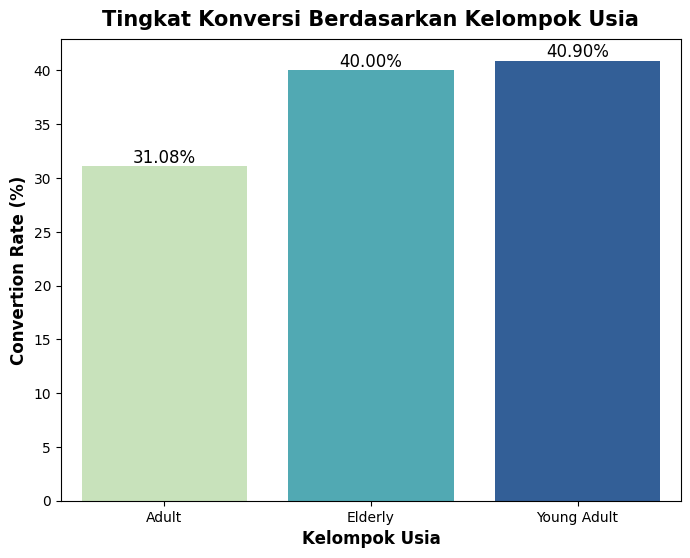

In [ ]:
  plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_group, x='kelompok_umur', y='cvr_new', palette='YlGnBu')
plt.title('Tingkat Konversi Berdasarkan Kelompok Usia', fontsize=15, weight='bold', y=1.01)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')


plt.xlabel('Kelompok Usia', fontsize=12, weight='bold')
plt.ylabel('Convertion Rate (%)', fontsize=12, weight='bold')

In [ ]:
df_group = data_fix.groupby('total_anak').agg({'total_pembelian':'sum',
                                                  'NumWebVisitsMonth':'sum'}).reset_index()

df_group['cvr_new'] = (df_group['NumWebVisitsMonth'] / df_group['total_pembelian']) * 100

df_group

,total_anak,total_pembelian,NumWebVisitsMonth,cvr_new
0,0,11201,2218,19.801803
1,1,16334,6696,40.994245
2,2,5137,2653,51.644929
3,3,619,342,55.250404


Text(0, 0.5, 'Convertion Rate (%)')

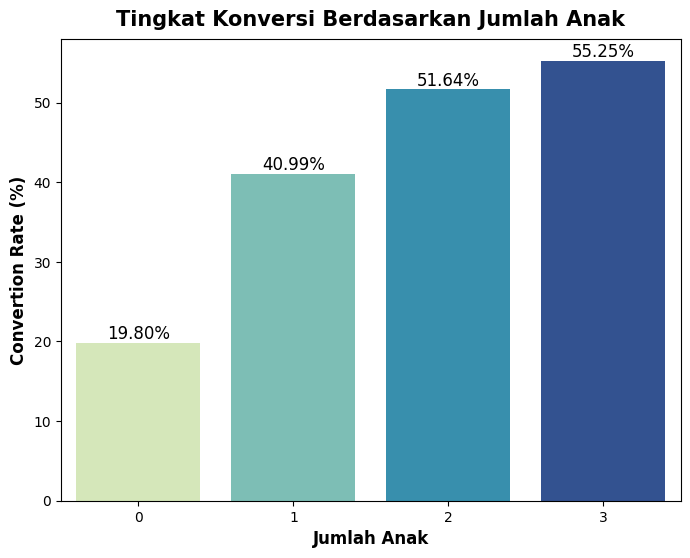

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_group, x='total_anak', y='cvr_new', palette='YlGnBu')
plt.title('Tingkat Konversi Berdasarkan Jumlah Anak', fontsize=15, weight='bold', y=1.01)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')


plt.xlabel('Jumlah Anak', fontsize=12, weight='bold')
plt.ylabel('Convertion Rate (%)', fontsize=12, weight='bold')

In [ ]:
df_group = data_fix.groupby('years_since_join').agg({'total_pembelian':'sum',
                                                  'NumWebVisitsMonth':'sum'}).reset_index()

df_group['cvr_new'] = (df_group['NumWebVisitsMonth'] / df_group['total_pembelian']) * 100

df_group

,years_since_join,total_pembelian,NumWebVisitsMonth,cvr_new
0,0,8222,2894,35.198249
1,1,17891,6341,35.442401
2,2,7178,2674,37.252717


Text(0, 0.5, 'Convertion Rate (%)')

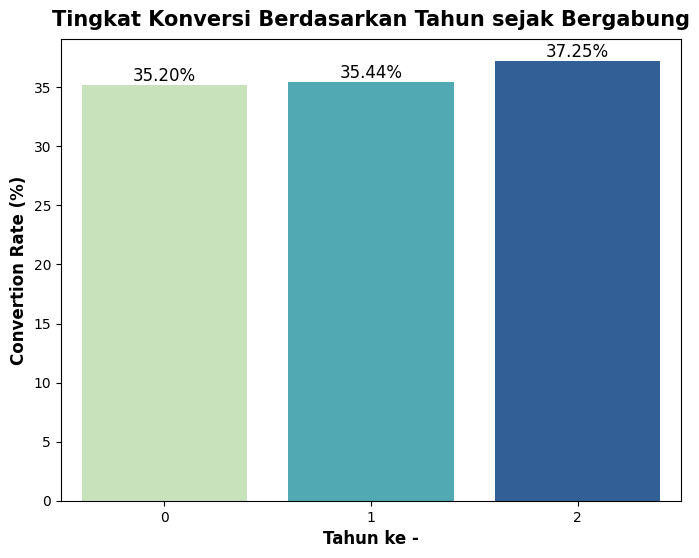

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_group, x='years_since_join', y='cvr_new', palette='YlGnBu')
plt.title('Tingkat Konversi Berdasarkan Tahun sejak Bergabung', fontsize=15, weight='bold', y=1.01)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')


plt.xlabel('Tahun ke -', fontsize=12, weight='bold')
plt.ylabel('Convertion Rate (%)', fontsize=12, weight='bold')

In [ ]:
df_group = data_fix.groupby('total_transaksi').agg({'total_pembelian':'sum',
                                                  'NumWebVisitsMonth':'sum'}).reset_index()

df_group['cvr_new'] = (df_group['NumWebVisitsMonth'] / df_group['total_pembelian']) * 100

df_group

,total_transaksi,total_pembelian,NumWebVisitsMonth,cvr_new
0,5000,0,14,inf
1,6000,0,14,inf
2,8000,23,33,143.478261
3,9000,19,26,136.842105
4,10000,20,28,140.000000
...,...,...,...,...
1049,2352000,24,2,8.333333
1050,2440000,25,5,20.000000
1051,2486000,26,5,19.230769
1052,2524000,29,4,13.793103


<Figure size 800x600 with 0 Axes>

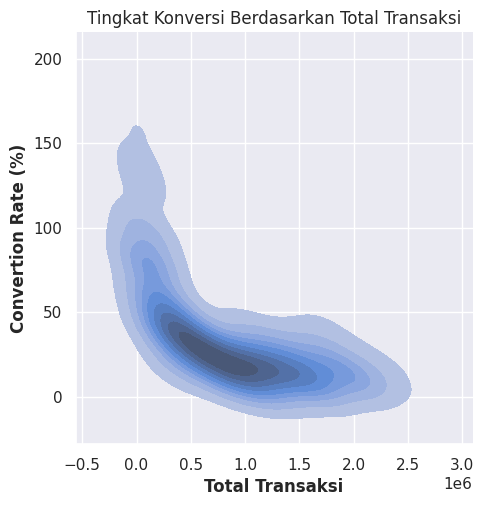

In [ ]:
# Membuat grafik line chart dengan hue
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.displot(df_group, x="total_transaksi", y="cvr_new", kind="kde", fill=True)
plt.title('Tingkat Konversi Berdasarkan Total Transaksi')
plt.xlabel('Total Transaksi', fontsize=12, weight='bold')
plt.ylabel('Convertion Rate (%)', fontsize=12, weight='bold')

# Menampilkan grafik
plt.show()

In [ ]:
df_group = data_fix.groupby('total_accepted_campaign').agg({'total_pembelian':'sum',
                                                  'NumWebVisitsMonth':'sum'}).reset_index()

df_group['cvr_new'] = (df_group['NumWebVisitsMonth'] / df_group['total_pembelian']) * 100

df_group

,total_accepted_campaign,total_pembelian,NumWebVisitsMonth,cvr_new
0,0,24649,9734,39.490446
1,1,5762,1651,28.653245
2,2,1720,333,19.360465
3,3,929,148,15.931109
4,4,231,43,18.614719


Text(0, 0.5, 'Convertion Rate (%)')

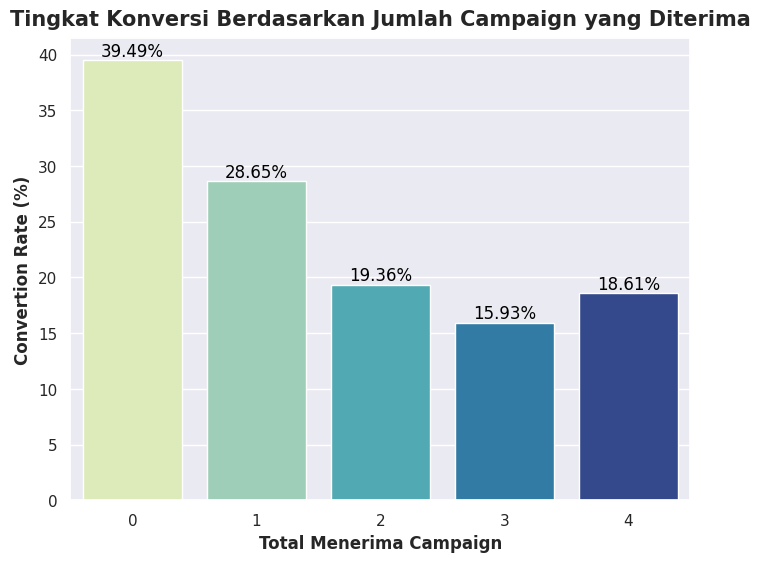

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_group, x='total_accepted_campaign', y='cvr_new', palette='YlGnBu')
plt.title('Tingkat Konversi Berdasarkan Jumlah Campaign yang Diterima', fontsize=15, weight='bold', y=1.01)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')


plt.xlabel('Total Menerima Campaign', fontsize=12, weight='bold')
plt.ylabel('Convertion Rate (%)', fontsize=12, weight='bold')

In [ ]:
df_group = data_fix.groupby('Education').agg({'total_pembelian':'sum',
                                                  'NumWebVisitsMonth':'sum'}).reset_index()

df_group['cvr_new'] = (df_group['NumWebVisitsMonth'] / df_group['total_pembelian']) * 100

df_group

,Education,total_pembelian,NumWebVisitsMonth,cvr_new
0,D3,2802,1107,39.507495
1,S1,16894,5959,35.272878
2,S2,5523,1916,34.691291
3,S3,7693,2556,33.225010
4,SMA,379,371,97.889182


Text(0, 0.5, 'Convertion Rate (%)')

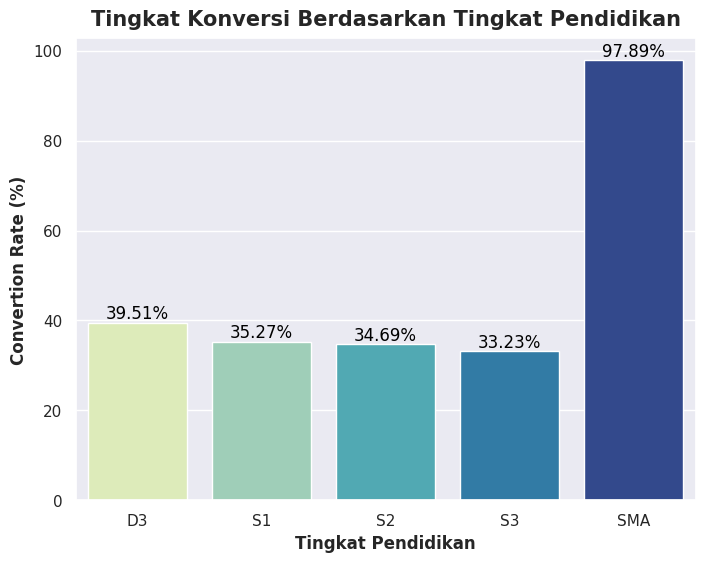

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_group, x='Education', y='cvr_new', palette='YlGnBu')
plt.title('Tingkat Konversi Berdasarkan Tingkat Pendidikan', fontsize=15, weight='bold', y=1.01)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')


plt.xlabel('Tingkat Pendidikan', fontsize=12, weight='bold')
plt.ylabel('Convertion Rate (%)', fontsize=12, weight='bold')

In [ ]:
df_group = data_fix.groupby('Marital_Status').agg({'total_pembelian':'sum',
                                                  'NumWebVisitsMonth':'sum'}).reset_index()

df_group['cvr_new'] = (df_group['NumWebVisitsMonth'] / df_group['total_pembelian']) * 100

df_group

,Marital_Status,total_pembelian,NumWebVisitsMonth,cvr_new
0,Bertunangan,8594,3051,35.501513
1,Cerai,3535,1273,36.011315
2,Duda,40,19,47.500000
3,Janda,1286,376,29.237947
4,Lajang,6914,2555,36.954006
5,Menikah,12922,4635,35.869061


Text(0, 0.5, 'Convertion Rate (%)')

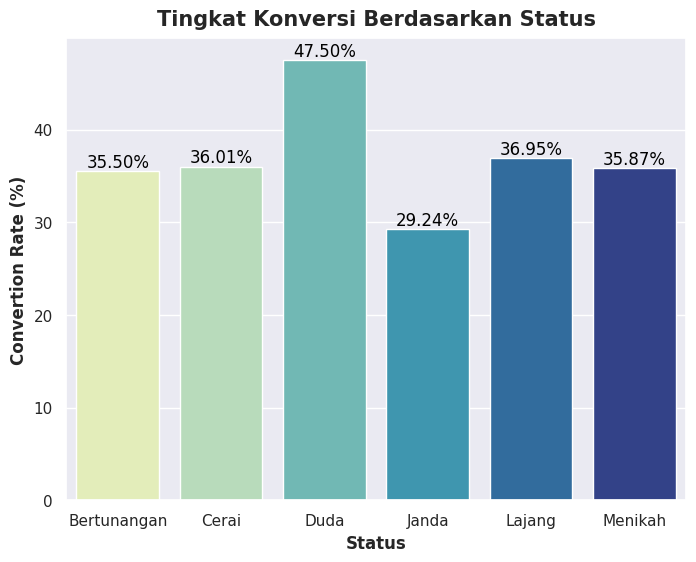

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_group, x='Marital_Status', y='cvr_new', palette='YlGnBu')
plt.title('Tingkat Konversi Berdasarkan Status', fontsize=15, weight='bold', y=1.01)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')


plt.xlabel('Status', fontsize=12, weight='bold')
plt.ylabel('Convertion Rate (%)', fontsize=12, weight='bold')

## Remove unneeded features

Terdapat Feature yang bisa di hapus karena hanya memiliki 1 data dan sudah dilakukan feature engineering :
1. Unnamed: 0
2. ID
3. Year_Birth
4. Z_CostContact
5. Z_Revenue
6. Kidhome
7. Teenhome
8. Dt_Customer
9. MntCoke
10. MntFruits
11. MntMeatProducts
12. MntFishProducts
13. MntSweetProducts
14. MntGoldProds
15. NumDealsPurchases
16. NumWebPurchases
17. NumCatalogPurchases
18. NumStorePurchases
19. NumWebVisitsMonth
20. AcceptedCmp4
21. AcceptedCmp5
22. AcceptedCmp1
23. AcceptedCmp2
24. AcceptedCmp3


In [ ]:
data_fix.drop(["Unnamed: 0","ID","Year_Birth","Z_CostContact","Z_Revenue","Kidhome","Teenhome","Dt_Customer","MntCoke","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3"], inplace=True, axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
data_fix.sample(10)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,total_pembelian,cvr,age,kelompok_umur,years_since_join,total_transaksi,total_anak,total_accepted_campaign
415,S3,Menikah,75865000.0,73,1,0,0,19,19.000000,71,Adult,0,1242000,0,0
1383,D3,Lajang,51381500.0,49,7,0,0,4,0.571429,50,Adult,0,21000,2,0
462,S3,Janda,50520000.0,25,6,0,0,9,1.500000,56,Adult,0,135000,1,0
797,D3,Cerai,60161000.0,17,8,0,0,26,3.250000,49,Adult,2,1071000,1,0
760,D3,Menikah,35523000.0,8,7,0,0,8,1.142857,33,Young Adult,1,66000,1,0
1332,S1,Menikah,71434000.0,4,4,0,0,21,5.250000,52,Adult,1,1400000,1,2
662,S1,Janda,58330000.0,87,4,0,0,24,6.000000,39,Young Adult,0,1064000,1,0
308,S2,Menikah,64100000.0,93,7,0,0,18,2.571429,50,Adult,1,546000,1,1
196,S2,Menikah,69661000.0,80,3,0,0,23,7.666667,34,Young Adult,0,834000,0,0
1308,S1,Menikah,65169000.0,23,6,0,1,28,4.666667,32,Young Adult,0,1189000,0,4


## Feature Encoding



Akan dilakukan feature encoding pada :
1. Education
2. Marital_status

In [ ]:
data_fix_2 = data_fix.copy()

## Standarisasi dan Hapus Outlier

In [ ]:
data_fix_model = data_fix_2.copy()

1. Outlier Handling

akan dilakukan penghapusan Outlier pada feature :
1. Age
2. Income

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data_fix_model)}')

nums = ['Income', 'age']

fil_ent = np.array([True] * len(data_fix_model))

for col in nums:
    Q1 = data_fix_model[col].quantile(0.25)
    Q3 = data_fix_model[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((data_fix_model[col] >= low_limit) & (data_fix_model[col] <= high_limit)) & fil_ent

data_fix_3 = data_fix_model[fil_ent]

for col in data_fix_3:
    data_fix_3[col] = data_fix_3[col].replace([np.inf, -np.inf], 0)

print('Jumlah baris setelah memfilter outlier', len(data_fix_3))


Jumlah baris sebelum memfilter outlier: 2240
Jumlah baris setelah memfilter outlier 2229


<ipython-input-41-eef5602002b3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fix_3[col] = data_fix_3[col].replace([np.inf, -np.inf], 0)


2. Standarisasi

In [ ]:
data_after_standar = data_fix_model.copy()

In [ ]:
pd.set_option('display.max_columns', None)
data_after_standar.sample(10)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,total_pembelian,cvr,age,kelompok_umur,years_since_join,total_transaksi,total_anak,total_accepted_campaign
423,S2,Menikah,82584000.0,26,1,0,1,16,16.000000,40,Young Adult,1,1435000,0,2
591,S2,Menikah,92163000.0,25,2,0,1,21,10.500000,39,Young Adult,1,2086000,0,2
2115,S2,Bertunangan,66476000.0,80,4,0,0,26,6.500000,45,Adult,1,1013000,1,0
1980,S1,Menikah,24570000.0,97,9,0,0,11,1.222222,30,Young Adult,1,193000,1,0
771,S3,Menikah,78939000.0,57,3,0,0,20,6.666667,63,Adult,0,1507000,0,0
1120,S1,Lajang,70566000.0,4,3,0,0,22,7.333333,46,Adult,1,757000,1,0
1802,S2,Bertunangan,59385000.0,85,5,0,0,10,2.000000,63,Adult,1,185000,2,0
724,S1,Menikah,7500000.0,19,9,0,1,12,1.333333,38,Young Adult,2,71000,1,1
1064,S3,Menikah,65526000.0,22,2,0,0,17,8.500000,50,Adult,0,506000,1,0
82,D3,Menikah,23559000.0,87,7,0,0,9,1.285714,41,Young Adult,1,79000,1,0


akan dilakukan standarisasi pada feature :
1. Income
2. Recency
3. total_pembelian
4. total_transaksi

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss_feature = ['Income', 'Recency', 'total_pembelian', 'total_transaksi']
data_after_standar[ss_feature] = ss.fit_transform(data_after_standar[ss_feature].astype(float))

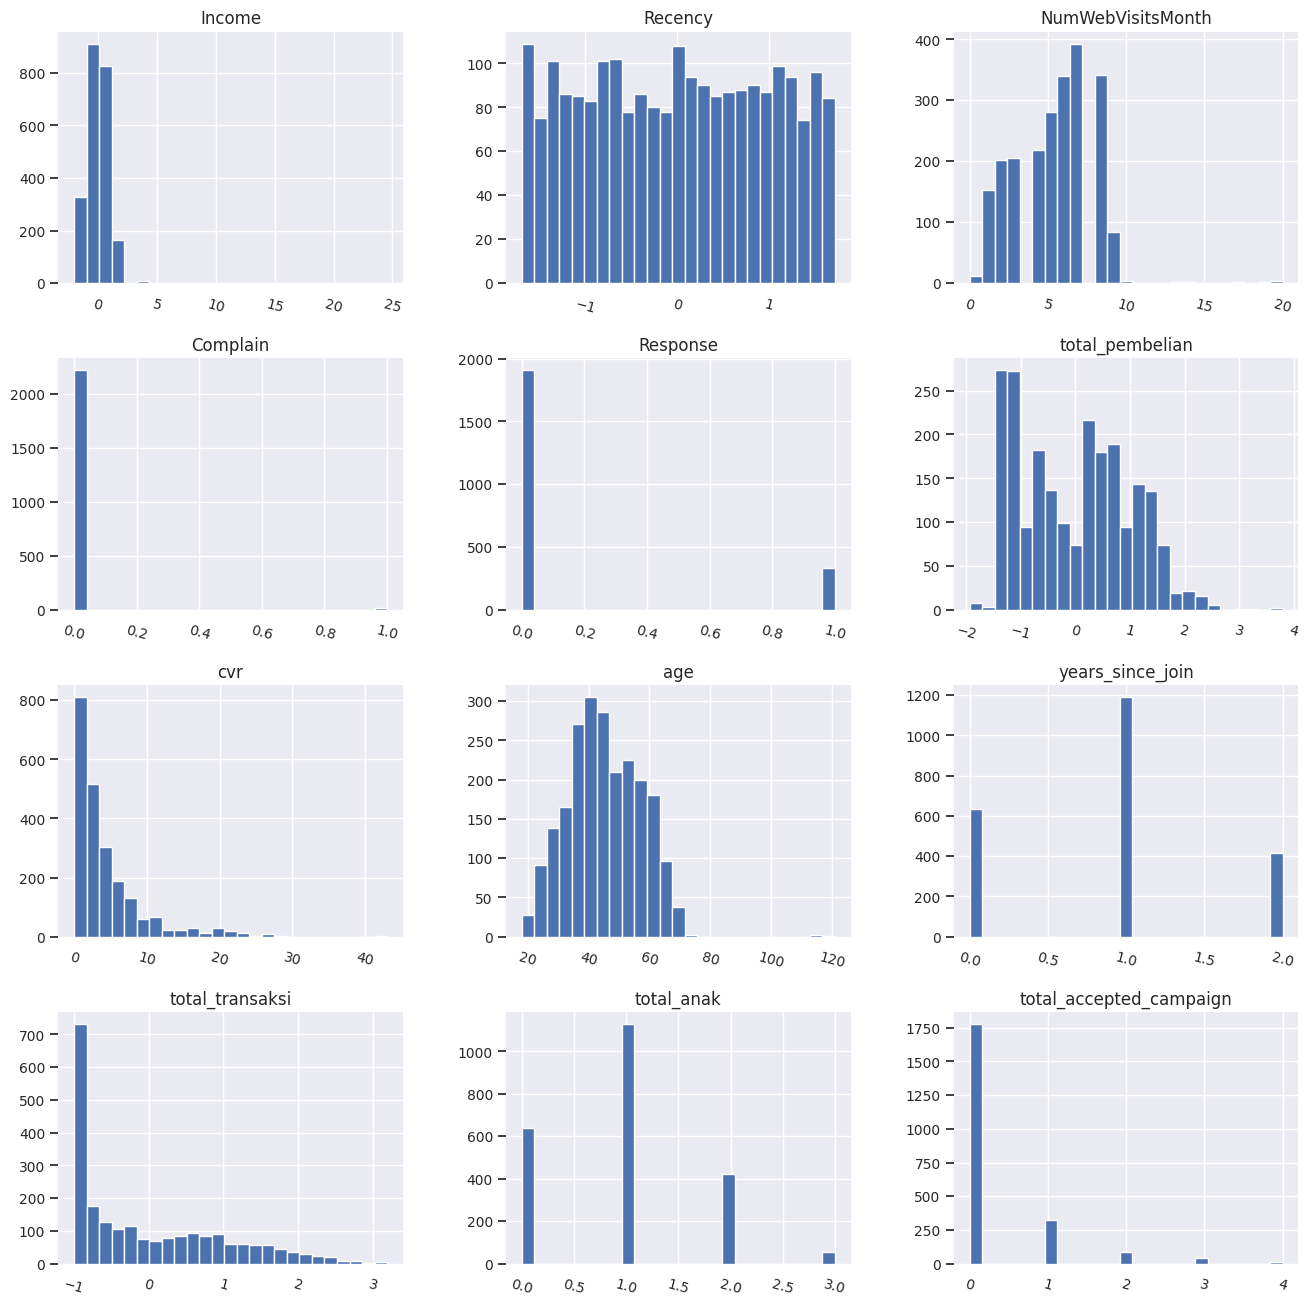

In [ ]:
h = data_after_standar.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

## Feature Selection

Untuk mensegmentasi pelanggan, ada metode yang disebut Analisis RFM :
1. Recency (R) : Mengukur seberapa baru pelanggan melakukan pembelian atau berinteraksi dengan bisnis Anda.
2. Frequency (F) : Ini melacak seberapa sering pelanggan melakukan pembelian atau terlibat dengan bisnis Anda selama periode tertentu.
3. Monetary (M) : Mengukur jumlah total uang yang dibelanjakan pelanggan untuk produk atau layanan Anda selama periode tertentu.

Dengan mempertimbangkan ketiga faktor ini, dapat mengkategorikan pelanggan ke dalam segmen yang berbeda berdasarkan perilaku mereka. Beberapa segmen pelanggan umum yang mungkin muncul dari analisis RFM meliputi:
1. Pelanggan Loyal: Mereka memiliki nilai Keterkinian, Frekuensi, dan Moneter yang tinggi, yang menunjukkan bahwa mereka adalah pembeli yang aktif dan sering berbelanja serta menghabiskan banyak uang.
2. Pelanggan Berpotensi Tinggi: Pelanggan ini mungkin memiliki Keterkinian yang tinggi namun nilai Frekuensi dan Moneter yang lebih rendah. Mereka dapat didorong untuk melakukan pembelian yang lebih sering dan bernilai lebih tinggi.
3. Pelanggan Hilang: Mereka memiliki nilai Keterkinian yang tinggi namun Frekuensi dan Moneter yang rendah, menunjukkan bahwa mereka adalah pelanggan aktif di masa lalu namun belum melakukan pembelian baru-baru ini.

1. Recency (R) : Recency
2. Frequency (F) : total_pembelian
3. Monetary (M) : total_transaksi
4. Loyality ( Total Campaign Accepted ) : total_accepted_campaign

In [ ]:
data_modeling = data_after_standar[['Recency','total_pembelian','total_transaksi','total_accepted_campaign']]

In [ ]:
data_modeling.head()

,Recency,total_pembelian,total_transaksi,total_accepted_campaign
0,0.307039,1.320826,1.679417,0
1,-0.383664,-1.154596,-0.961275,0
2,-0.798086,0.799685,0.282673,0
3,-0.798086,-0.894025,-0.918094,0
4,1.550305,0.539114,-0.305254,0


## Modeling

K-Means (Elbow Score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

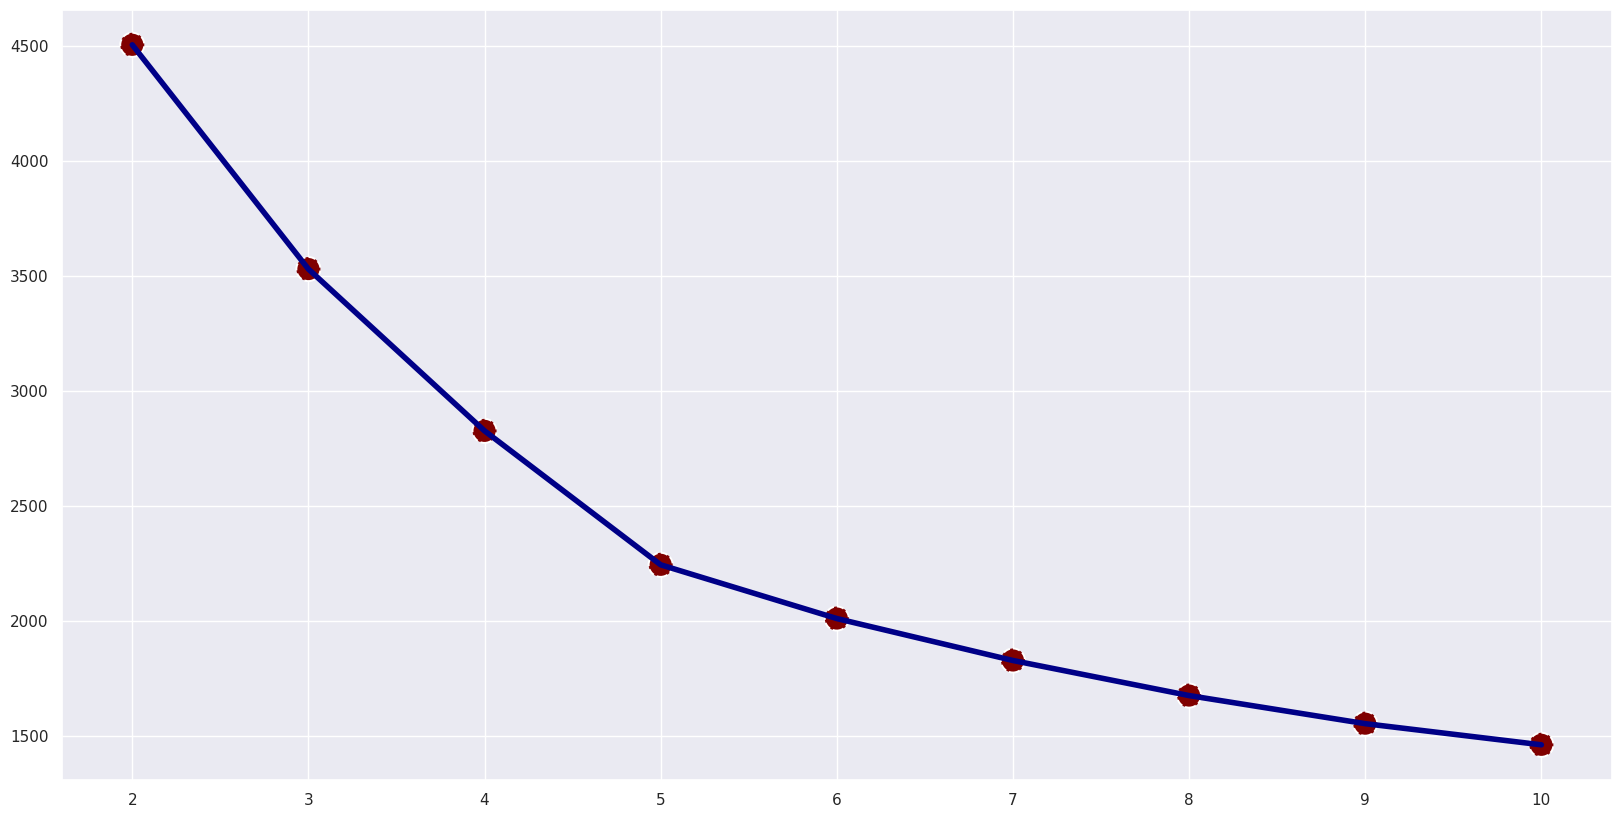

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_modeling)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

Silhouette score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

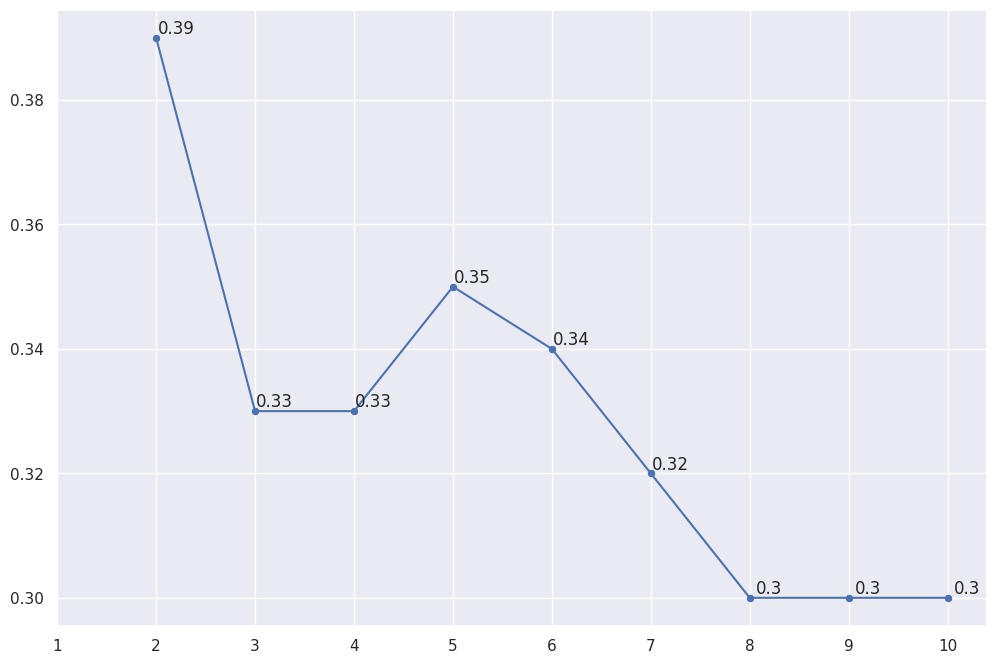

In [ ]:
arr_silhouette_score = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i).fit(data_modeling)
    preds = kmeans.predict(data_modeling)
    score_euclidean = silhouette_score(data_modeling, preds, metric='euclidean')
    arr_silhouette_score.append(np.round(score_euclidean ,2))

x = range(2,11)

plt.figure(figsize=(12,8))
sns.lineplot(x=x, y=arr_silhouette_score)
sns.scatterplot(x=x, y=arr_silhouette_score)

for i, label in enumerate(arr_silhouette_score):
    plt.text(x[i] + 0.2, arr_silhouette_score[i], label, ha='center', va='bottom')

plt.xticks(range(1,11 ,1))
plt.show()

Didapatkan bahwa jumlah cluster yang paling optimal adalah 5, dengan silhouette score sebesar 0.35

Train Model

In [ ]:
model = KMeans(n_clusters=5, random_state=0).fit(data_modeling)
data_modeling['Cluster'] = model.labels_
data_fix_model['Cluster'] = model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-50-e7c3dca548d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modeling['Cluster'] = model.labels_


In [ ]:
data_fix_model

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,total_pembelian,cvr,age,kelompok_umur,years_since_join,total_transaksi,total_anak,total_accepted_campaign,Cluster
0,S1,Lajang,58138000.0,58,7,0,1,25,3.571429,57,Adult,2,1617000,0,0,2
1,S1,Lajang,46344000.0,38,5,0,0,6,1.200000,60,Adult,0,27000,2,0,3
2,S1,Bertunangan,71613000.0,26,4,0,0,21,5.250000,49,Adult,1,776000,0,0,4
3,S1,Bertunangan,26646000.0,26,6,0,0,8,1.333333,30,Young Adult,0,53000,1,0,3
4,S3,Menikah,58293000.0,94,5,0,0,19,3.800000,33,Young Adult,0,422000,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,S1,Menikah,61223000.0,46,5,0,0,18,3.600000,47,Adult,1,1341000,1,0,2
2236,S3,Bertunangan,64014000.0,56,7,0,0,22,3.142857,68,Adult,0,444000,3,1,2
2237,S1,Cerai,56981000.0,91,6,0,0,19,3.166667,33,Young Adult,0,1241000,0,1,2
2238,S2,Bertunangan,69245000.0,8,3,0,0,23,7.666667,58,Adult,0,843000,1,0,4


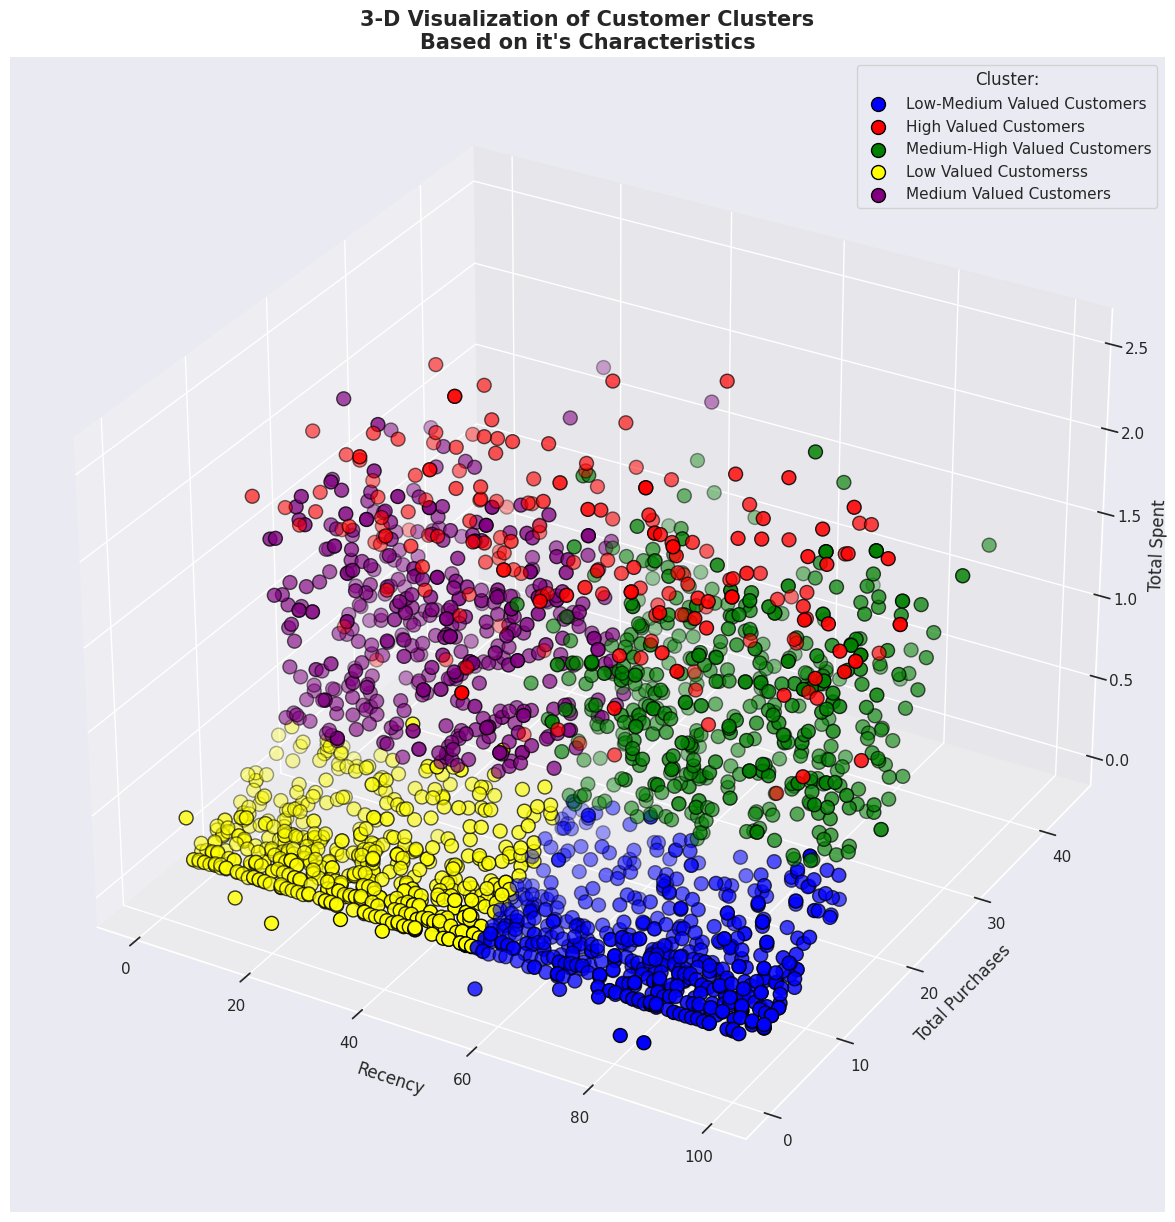

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters\nBased on it's Characteristics", fontsize=15, weight='bold')
ax.scatter(data_fix_model['Recency'][data_fix_model.Cluster == 0], data_fix_model['total_pembelian'][data_fix_model.Cluster == 0], data_fix_model['total_transaksi'][data_fix_model.Cluster == 0], c='blue', s=100, edgecolor='black', label='Low-Medium Valued Customers')
ax.scatter(data_fix_model['Recency'][data_fix_model.Cluster == 1], data_fix_model['total_pembelian'][data_fix_model.Cluster == 1], data_fix_model['total_transaksi'][data_fix_model.Cluster == 1], c='red', s=100, edgecolor='black', label='High Valued Customers')
ax.scatter(data_fix_model['Recency'][data_fix_model.Cluster == 2], data_fix_model['total_pembelian'][data_fix_model.Cluster == 2], data_fix_model['total_transaksi'][data_fix_model.Cluster == 2], c='green', s=100, edgecolor='black',  label='Medium-High Valued Customers')
ax.scatter(data_fix_model['Recency'][data_fix_model.Cluster == 3], data_fix_model['total_pembelian'][data_fix_model.Cluster == 3], data_fix_model['total_transaksi'][data_fix_model.Cluster == 3], c='yellow', s=100, edgecolor='black', label='Low Valued Customerss')
ax.scatter(data_fix_model['Recency'][data_fix_model.Cluster == 4], data_fix_model['total_pembelian'][data_fix_model.Cluster == 4], data_fix_model['total_transaksi'][data_fix_model.Cluster == 4], c='purple', s=100, edgecolor='black', label='Medium Valued Customers')
plt.xlabel('Recency')
plt.ylabel('Total Purchases')
ax.set_zlabel('Total Spent')
plt.legend(title='Cluster:')
plt.show()

Karena sulit melihat hasil clustering pada visualisasi 3d maka kita akan visualisasi 2d menggunakan PCA

PCA

In [ ]:
df_pca = data_modeling.drop(columns = 'Cluster')

In [ ]:
df_pca

,Recency,total_pembelian,total_transaksi,total_accepted_campaign
0,0.307039,1.320826,1.679417,0
1,-0.383664,-1.154596,-0.961275,0
2,-0.798086,0.799685,0.282673,0
3,-0.798086,-0.894025,-0.918094,0
4,1.550305,0.539114,-0.305254,0
...,...,...,...,...
2235,-0.107383,0.408829,1.221032,0
2236,0.237969,0.929970,-0.268717,1
2237,1.446700,0.539114,1.054951,1
2238,-1.419719,1.060255,0.393948,0


In [ ]:
pca = PCA(n_components=2)
pca.fit(df_pca)
x_pca = pca.transform(df_pca)

In [ ]:
pdf = pd.DataFrame(x_pca, columns= ['pc1', 'pc2'])

In [ ]:
pdf['Cluster'] = model.labels_
pdf

,pc1,pc2,Cluster
0,1.994960,0.286479,2
1,-1.528535,-0.354084,3
2,0.649390,-0.805730,4
3,-1.330423,-0.773033,3
4,0.108876,1.547646,2
...,...,...,...
2235,1.052031,-0.110601,2
2236,0.615694,0.206047,2
2237,1.296517,1.418089,2
2238,0.890962,-1.431962,4


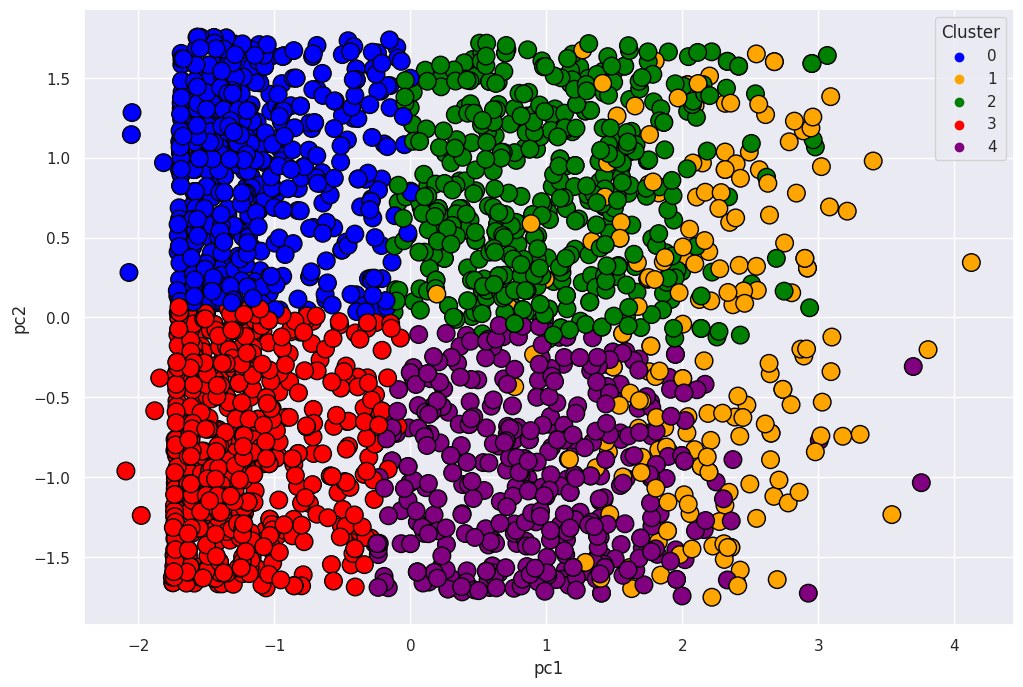

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

sns.scatterplot(
    x="pc1", y="pc2",
    hue="Cluster",
    edgecolor='black',
    #linestyle='--',
    data=pdf,
    palette=['blue','orange','green','red','purple'],
    s=160,
    ax=ax
);

Insight

In [ ]:
cluster_tag = []

for i in data_fix_model['Cluster']:
    if i == 0:
        grup = 'Low-Medium Valued Customers'
    elif i == 1:
        grup = 'High Valued Customers'
    elif i == 2:
        grup = 'Medium-High Valued Customers'
    elif i == 3:
        grup = 'Low Valued Customers'
    else :
        grup = 'Medium Valued Customers'
    cluster_tag.append(grup)

data_fix_model['Cluster_tag'] = cluster_tag

In [ ]:
data_fix_model_1 = data_fix_model[['Income','Recency','total_pembelian','total_transaksi','total_accepted_campaign','NumWebVisitsMonth','Cluster_tag']]

display(data_fix_model_1.groupby('Cluster_tag').agg(['median','max']))

Income              Recency      \
                                  median          max  median max   
Cluster_tag                                                         
High Valued Customers         80184000.0  105471000.0    46.0  99   
Low Valued Customers          35701000.0  666666000.0    25.0  50   
Low-Medium Valued Customers   36627000.0  156924000.0    76.0  99   
Medium Valued Customers       65208000.0  160803000.0    21.0  48   
Medium-High Valued Customers  65748000.0  157243000.0    72.0  99   

                             total_pembelian     total_transaksi           \
                                      median max          median      max   
Cluster_tag                                                                 
High Valued Customers                   21.0  32       1679000.0  2525000   
Low Valued Customers                     8.0  17         68000.0   825000   
Low-Medium Valued Customers              8.0  18         72000.0   801000   
Medium Valued Customers                 21.0  44        907000.0  2092000   
Medium-High Valued Customers            21.0  39        981000.0  2440000   

                             total_accepted_campaign     NumWebVisitsMonth      
                                              median max            median max  
Cluster_tag                                                                     
High Valued Customers                            2.0   4               3.0   9  
Low Valued Customers                             0.0   2               7.0  19  
Low-Medium Valued Customers                      0.0   1               7.0  20  
Medium Valued Customers                          0.0   2               5.0  10  
Medium-High Valued Customers                     0.0   2               4.0   9

In [ ]:
df_group_cvr = data_fix_model.groupby('Cluster_tag').agg({'total_pembelian':'sum',
                                                  'NumWebVisitsMonth':'sum'})

df_group_cvr['cvr'] = (df_group_cvr['NumWebVisitsMonth'] / df_group_cvr['total_pembelian']) * 100

df_group_cvr


,total_pembelian,NumWebVisitsMonth,cvr
Cluster_tag,,,
High Valued Customers,4266,705,16.526020
Low Valued Customers,4780,3679,76.966527
Low-Medium Valued Customers,4743,3470,73.160447
Medium Valued Customers,8983,1924,21.418234
Medium-High Valued Customers,10519,2131,20.258580


In [ ]:
data_fix_model

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,total_pembelian,cvr,age,kelompok_umur,years_since_join,total_transaksi,total_anak,total_accepted_campaign,Cluster,Cluster_tag
0,S1,Lajang,58138000.0,58,7,0,1,25,3.571429,57,Adult,2,1617000,0,0,2,Medium-High Valued Customers
1,S1,Lajang,46344000.0,38,5,0,0,6,1.200000,60,Adult,0,27000,2,0,3,Low Valued Customers
2,S1,Bertunangan,71613000.0,26,4,0,0,21,5.250000,49,Adult,1,776000,0,0,4,Medium Valued Customers
3,S1,Bertunangan,26646000.0,26,6,0,0,8,1.333333,30,Young Adult,0,53000,1,0,3,Low Valued Customers
4,S3,Menikah,58293000.0,94,5,0,0,19,3.800000,33,Young Adult,0,422000,1,0,2,Medium-High Valued Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,S1,Menikah,61223000.0,46,5,0,0,18,3.600000,47,Adult,1,1341000,1,0,2,Medium-High Valued Customers
2236,S3,Bertunangan,64014000.0,56,7,0,0,22,3.142857,68,Adult,0,444000,3,1,2,Medium-High Valued Customers
2237,S1,Cerai,56981000.0,91,6,0,0,19,3.166667,33,Young Adult,0,1241000,0,1,2,Medium-High Valued Customers
2238,S2,Bertunangan,69245000.0,8,3,0,0,23,7.666667,58,Adult,0,843000,1,0,4,Medium Valued Customers


Total Customers in Each Cluster

In [ ]:
df_ac = data_fix_model.groupby(['Cluster_tag'])['age'].count().reset_index()
df_ac.rename(columns = {'age' : 'Total Customer'}, inplace=True)
df_ac['Percentage'] = np.round(df_ac['Total Customer'] / df_ac['Total Customer'].sum() * 100, 2)

df_ac

,Cluster_tag,Total Customer,Percentage
0,High Valued Customers,201,8.97
1,Low Valued Customers,581,25.94
2,Low-Medium Valued Customers,551,24.60
3,Medium Valued Customers,416,18.57
4,Medium-High Valued Customers,491,21.92


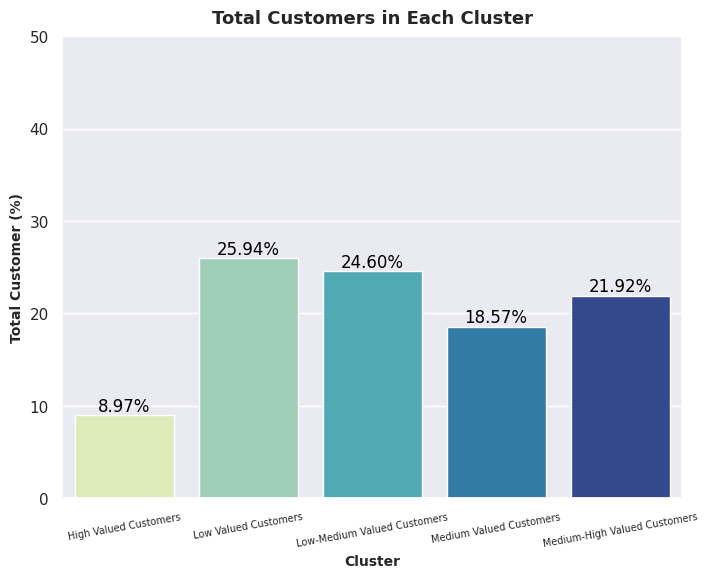

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_ac, x='Cluster_tag', y='Percentage', palette='YlGnBu')
plt.title('Total Customers in Each Cluster', fontsize=13, weight='bold', y=1.01)

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Cluster', fontsize=10, weight='bold')
plt.ylabel('Total Customer (%)', fontsize=10, weight='bold')

ax.set_xticklabels(ax.get_xticklabels(), rotation=10, fontsize=7)

plt.ylim(0,50)

plt.show()

Total Customers in Each Cluster Based on Educational Level

In [ ]:
df_group = data_fix_model.groupby('Cluster_tag').size().reset_index(name='Total')
df_group1=data_fix_model.groupby(['Cluster_tag','Education']).size().reset_index(name='Jumlah')
df_gab = df_group1.merge(df_group, on='Cluster_tag', how='left')
df_gab['Rasio']= round((df_gab['Jumlah']/df_gab['Total'])*100, 2)

df_gab

,Cluster_tag,Education,Jumlah,Total,Rasio
0,High Valued Customers,D3,16,201,7.96
1,High Valued Customers,S1,105,201,52.24
2,High Valued Customers,S2,34,201,16.92
3,High Valued Customers,S3,46,201,22.89
4,Low Valued Customers,D3,58,581,9.98
5,Low Valued Customers,S1,277,581,47.68
6,Low Valued Customers,S2,99,581,17.04
7,Low Valued Customers,S3,118,581,20.31
8,Low Valued Customers,SMA,29,581,4.99
9,Low-Medium Valued Customers,D3,61,551,11.07


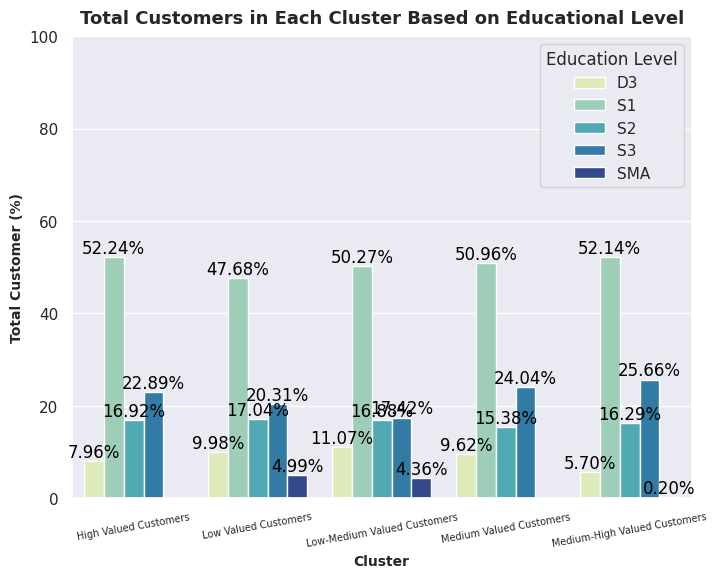

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab, x='Cluster_tag', y='Rasio', hue='Education', palette='YlGnBu')
plt.title('Total Customers in Each Cluster Based on Educational Level', fontsize=13, weight='bold', y=1.01)

# Add a legend
plt.legend(title='Education Level', loc='upper right')

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Cluster', fontsize=10, weight='bold')
plt.ylabel('Total Customer (%)', fontsize=10, weight='bold')

ax.set_xticklabels(ax.get_xticklabels(), rotation=10, fontsize=7)

plt.ylim(0,100)

plt.show()

Total Customer in Each Cluster Based on Marital Status

In [ ]:
df_group = data_fix_model.groupby('Cluster_tag').size().reset_index(name='Total')
df_group1=data_fix_model.groupby(['Cluster_tag','Marital_Status']).size().reset_index(name='Jumlah')
df_gab = df_group1.merge(df_group, on='Cluster_tag', how='left')
df_gab['Rasio']= round((df_gab['Jumlah']/df_gab['Total'])*100, 2)

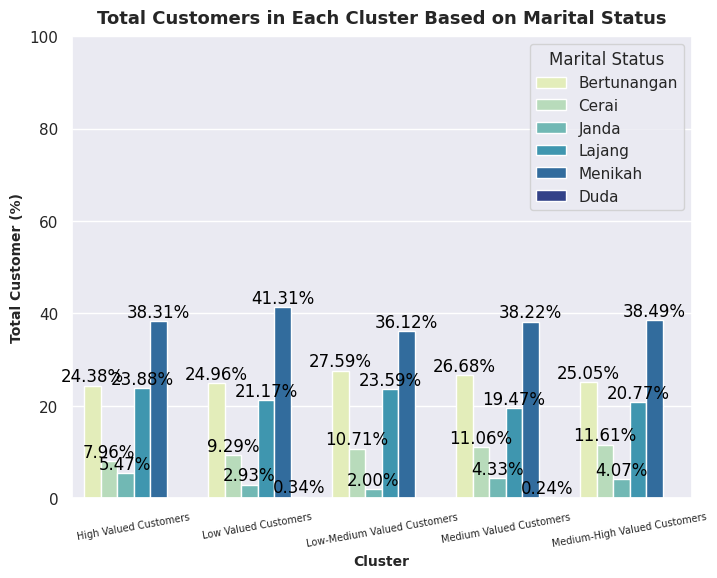

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab, x='Cluster_tag', y='Rasio', hue='Marital_Status', palette='YlGnBu')
plt.title('Total Customers in Each Cluster Based on Marital Status', fontsize=13, weight='bold', y=1.01)

# Add a legend
plt.legend(title='Marital Status', loc='upper right')

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Cluster', fontsize=10, weight='bold')
plt.ylabel('Total Customer (%)', fontsize=10, weight='bold')

ax.set_xticklabels(ax.get_xticklabels(), rotation=10, fontsize=7)

plt.ylim(0,100)

plt.show()

Total Customer in Each Cluster Based on Total Children

In [ ]:
df_group = data_fix_model.groupby('Cluster_tag').size().reset_index(name='Total')
df_group1=data_fix_model.groupby(['Cluster_tag','total_anak']).size().reset_index(name='Jumlah')
df_gab = df_group1.merge(df_group, on='Cluster_tag', how='left')
df_gab['Rasio']= round((df_gab['Jumlah']/df_gab['Total'])*100, 2)

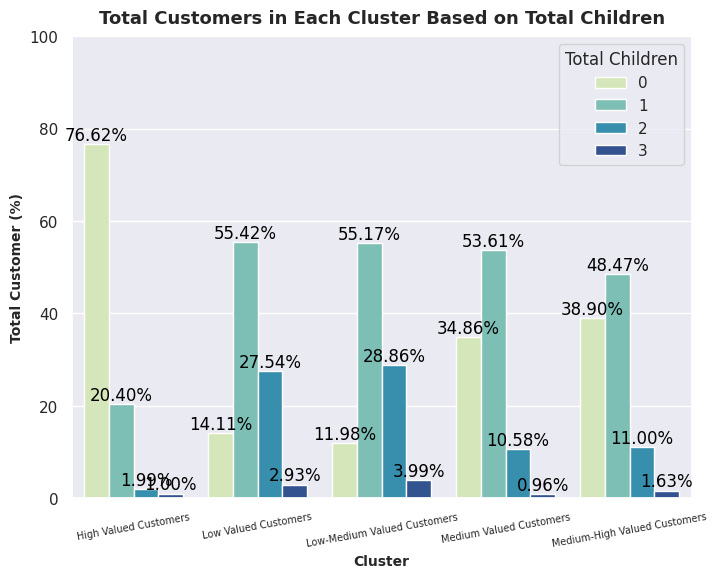

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab, x='Cluster_tag', y='Rasio', hue='total_anak', palette='YlGnBu')
plt.title('Total Customers in Each Cluster Based on Total Children', fontsize=13, weight='bold', y=1.01)

# Add a legend
plt.legend(title='Total Children', loc='upper right')

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Cluster', fontsize=10, weight='bold')
plt.ylabel('Total Customer (%)', fontsize=10, weight='bold')

ax.set_xticklabels(ax.get_xticklabels(), rotation=10, fontsize=7)

plt.ylim(0,100)

plt.show()

Total Customer in Each Cluster Based on Total Accepted Campaign

In [ ]:
df_group = data_fix_model.groupby('Cluster_tag').size().reset_index(name='Total')
df_group1=data_fix_model.groupby(['Cluster_tag','total_accepted_campaign']).size().reset_index(name='Jumlah')
df_gab = df_group1.merge(df_group, on='Cluster_tag', how='left')
df_gab['Rasio']= round((df_gab['Jumlah']/df_gab['Total'])*100, 2)

df_gab

,Cluster_tag,total_accepted_campaign,Jumlah,Total,Rasio
0,High Valued Customers,1,69,201,34.33
1,High Valued Customers,2,77,201,38.31
2,High Valued Customers,3,44,201,21.89
3,High Valued Customers,4,11,201,5.47
4,Low Valued Customers,0,530,581,91.22
5,Low Valued Customers,1,48,581,8.26
6,Low Valued Customers,2,3,581,0.52
7,Low-Medium Valued Customers,0,508,551,92.20
8,Low-Medium Valued Customers,1,43,551,7.80
9,Medium Valued Customers,0,337,416,81.01


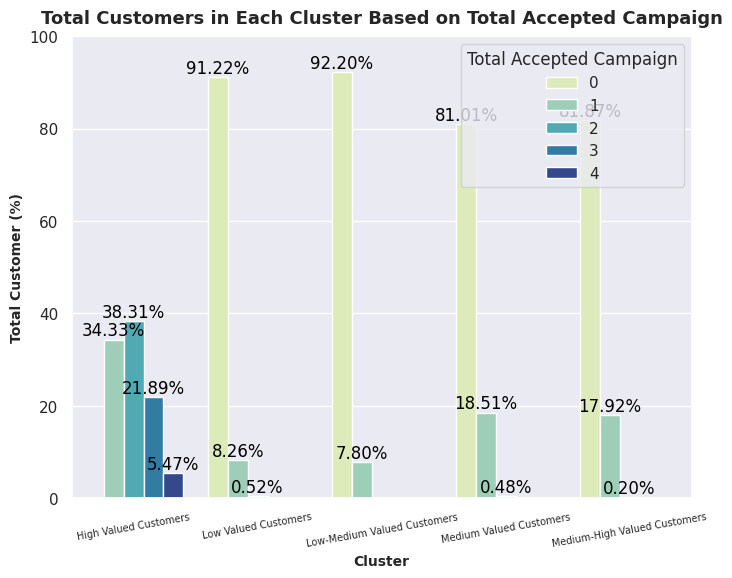

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab, x='Cluster_tag', y='Rasio', hue='total_accepted_campaign', palette='YlGnBu')
plt.title('Total Customers in Each Cluster Based on Total Accepted Campaign', fontsize=13, weight='bold', y=1.01)

# Add a legend
plt.legend(title='Total Accepted Campaign', loc='upper right')

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Cluster', fontsize=10, weight='bold')
plt.ylabel('Total Customer (%)', fontsize=10, weight='bold')

ax.set_xticklabels(ax.get_xticklabels(), rotation=10, fontsize=7)

plt.ylim(0,100)

plt.show()

Total Customer in Each Cluster Based on Age

In [ ]:
df_group = data_fix_model.groupby('Cluster_tag').size().reset_index(name='Total')
df_group1=data_fix_model.groupby(['Cluster_tag','kelompok_umur']).size().reset_index(name='Jumlah')
df_gab = df_group1.merge(df_group, on='Cluster_tag', how='left')
df_gab['Rasio']= round((df_gab['Jumlah']/df_gab['Total'])*100, 2)

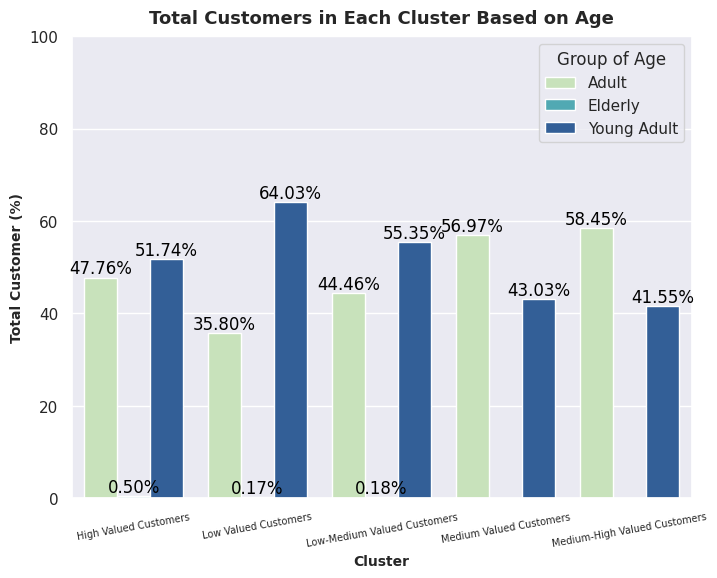

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab, x='Cluster_tag', y='Rasio', hue='kelompok_umur', palette='YlGnBu')
plt.title('Total Customers in Each Cluster Based on Age', fontsize=13, weight='bold', y=1.01)

# Add a legend
plt.legend(title='Group of Age', loc='upper right')

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Cluster', fontsize=10, weight='bold')
plt.ylabel('Total Customer (%)', fontsize=10, weight='bold')

ax.set_xticklabels(ax.get_xticklabels(), rotation=10, fontsize=7)

plt.ylim(0,100)

plt.show()

Potential Impact

In [ ]:
df_ac = data_fix_model.groupby(['Cluster_tag'])['total_transaksi'].sum().reset_index()
df_ac.rename(columns = {'total_transaksi' : 'Total Amount'}, inplace=True)
df_ac

,Cluster_tag,Total Amount
0,High Valued Customers,330916000
1,Low Valued Customers,66590000
2,Low-Medium Valued Customers,67593000
3,Medium Valued Customers,390720000
4,Medium-High Valued Customers,501169000
